In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from utils import gray_to_color, show_images


sjtu: (449, 598, 3), logo:(225, 225, 3)


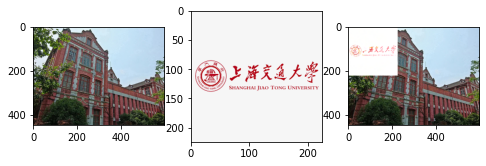

In [2]:
fig, axes = plt.subplots(1,3, figsize=(8,8))

image_sjtu = cv2.imread("images/sjtu.jpeg")
image_sjtu = cv2.cvtColor(image_sjtu, cv2.COLOR_BGR2RGB)
axes[0].imshow(image_sjtu)

image_logo = cv2.imread("images/sjtu-logo.png")
image_logo = cv2.cvtColor(image_logo, cv2.COLOR_BGR2RGB)
axes[1].imshow(image_logo)

print(f"sjtu: {image_sjtu.shape}, logo:{image_logo.shape}")

roi = image_sjtu[0:225, 0:225]
roi[:] = cv2.add(roi, image_logo)
# roi[:] = cv2.subtract(roi, image_logo)
# roi[:] = cv2.multiply(roi, image_logo)
# roi[:] = cv2.divide(roi, image_logo)
# roi[:] = cv2.addWeighted(roi, 0.6, image_logo, 0.4, 0)

axes[2].imshow(image_sjtu)


sjtu: (449, 598, 3), logo:(225, 225, 3)


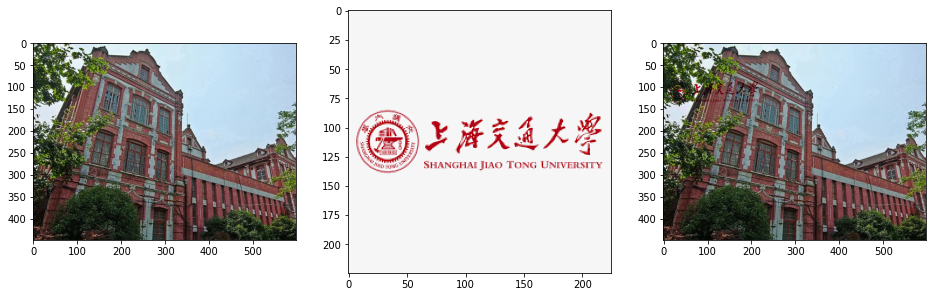

In [3]:

fig, axes = plt.subplots(1,3, figsize=(16,16))

image_sjtu = cv2.imread("images/sjtu.jpeg")
image_sjtu = cv2.cvtColor(image_sjtu, cv2.COLOR_BGR2RGB)
axes[0].imshow(image_sjtu)

image_logo = cv2.imread("images/sjtu-logo.png")
image_logo = cv2.cvtColor(image_logo, cv2.COLOR_BGR2RGB)
axes[1].imshow(image_logo)

print(f"sjtu: {image_sjtu.shape}, logo:{image_logo.shape}")

roi = image_sjtu[0:225, 0:225]
roi[:] = cv2.bitwise_and(roi, image_logo)
# roi[:] = cv2.bitwise_or(roi, image_logo)
# roi[:] = cv2.bitwise_xor(roi, image_logo)
# roi[:] = cv2.bitwise_not(roi)

axes[2].imshow(image_sjtu)

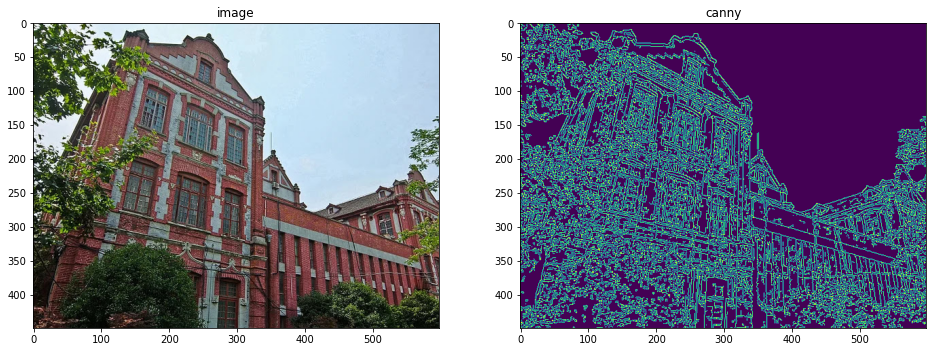

In [4]:
# Canny edge detection.
image = cv2.imread("images/sjtu.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# the edge pixels above the upper limit(200) are considered 
#   and edge pixels below the threshold(100) are discarded.
# pixels in (100,200) are considered only if they are connected to pixels in the upper threshold.
# Thus we get a clean edge.
edges = cv2.Canny(image, 100, 200) # threshold

show_images(1, 2, [image, edges], titles=["image", "canny"])

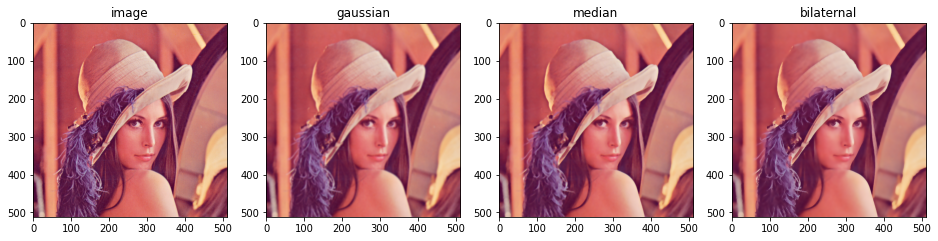

In [5]:
# Image Blurring

image = cv2.imread("images/lena.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Gaussian Blur
gaussian = cv2.GaussianBlur(image, (7, 7), 0)
# Median Blur
median = cv2.medianBlur(image, 5)
# Bilateral Blur
bilateral = cv2.bilateralFilter(image, 9, 75, 75)

show_images(1, 4, [image, gaussian, median, bilateral], titles=["image", "gaussian", "median", "bilaternal"])


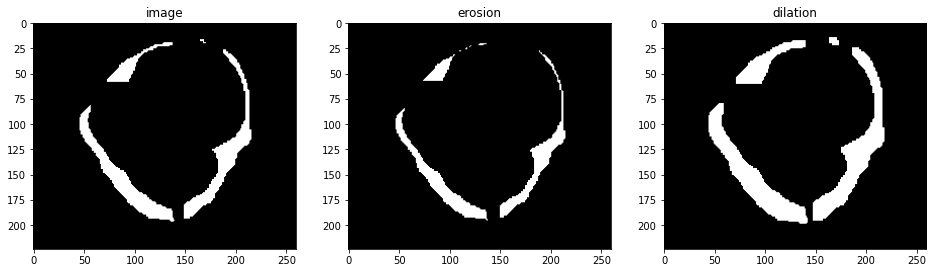

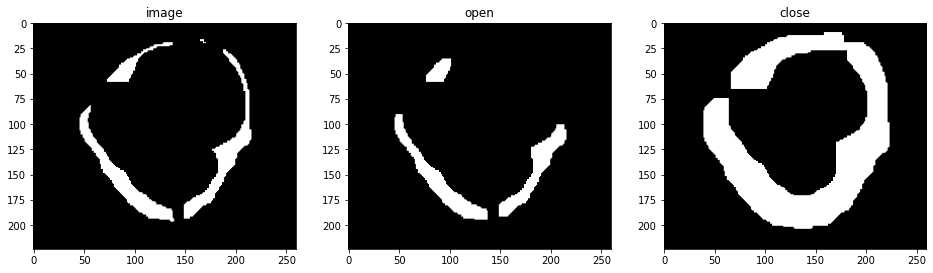

In [6]:
# Morphological operations

# read a mask, convert to binary
mask = cv2.imread("images/mask.jpg")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
_ret, mask = cv2.threshold(mask, 120, 255, cv2.THRESH_BINARY) # Binary Threshold

# Taking a matrix of size 3 as the kernel
kernel = np.ones((3, 3), np.uint8)
 
img_erosion = cv2.erode(mask, kernel, iterations=1)
img_dilation = cv2.dilate(mask, kernel, iterations=2)

# open
img_open = cv2.erode(mask, kernel, iterations=3)
img_open = cv2.dilate(img_open, kernel, iterations=3)

# close
img_close = cv2.dilate(mask, kernel, iterations=15)
img_close = cv2.erode(img_close, kernel, iterations=8)

# conver gray to color
mask = gray_to_color(mask)
img_erosion = gray_to_color(img_erosion)
img_dilation = gray_to_color(img_dilation)
img_open = gray_to_color(img_open)
img_close = gray_to_color(img_close)

images = [mask, img_erosion, img_dilation]
show_images(1, 3, images, (16, 8), titles=["image", "erosion", "dilation"])

images = [mask, img_open, img_close]
show_images(1, 3, images, (16, 8), titles=["image", "open", "close"])

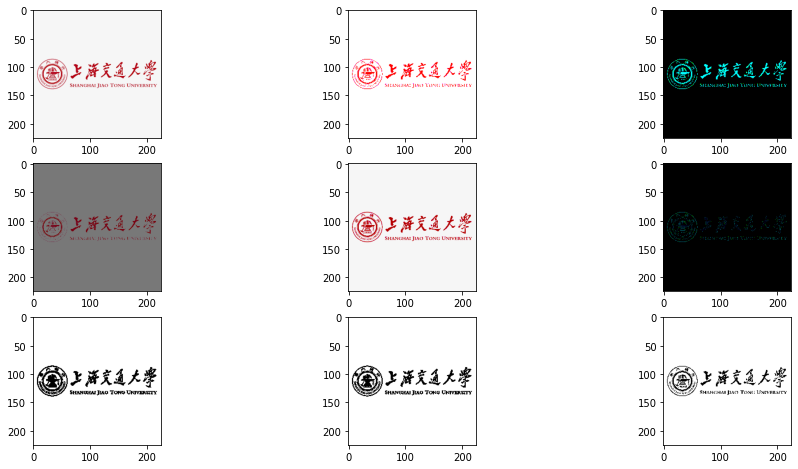

In [7]:
# Thresholding 
image_logo = cv2.imread("images/sjtu-logo.png")
image_logo = cv2.cvtColor(image_logo, cv2.COLOR_BGR2RGB)

_ret, thresh1 = cv2.threshold(image_logo, 120, 255, cv2.THRESH_BINARY) # Binary Threshold
_ret, thresh2 = cv2.threshold(image_logo, 120, 255, cv2.THRESH_BINARY_INV) # Binary Threshold Inverted
_ret, thresh3 = cv2.threshold(image_logo, 120, 255, cv2.THRESH_TRUNC) # Truncated Threshold
_ret, thresh4 = cv2.threshold(image_logo, 120, 255, cv2.THRESH_TOZERO) # Set to 0
_ret, thresh5 = cv2.threshold(image_logo, 120, 255, cv2.THRESH_TOZERO_INV) # Set to 0 Inverted

image_logo_gray = cv2.cvtColor(image_logo, cv2.COLOR_RGB2GRAY)
# Adaptive Mean
#   Threshold Value = (Mean of the neighbourhood area values – constant value). 
#   In other words, it is the mean of the blockSize×blockSize neighborhood of a point minus constant.
thresh6 = cv2.adaptiveThreshold(image_logo_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5)
thresh6 = cv2.cvtColor(thresh6, cv2.COLOR_GRAY2RGB)
# Adaptive Gaussian
#   Threshold Value = (Gaussian-weighted sum of the neighbourhood values – constant value). 
#   In other words, it is a weighted sum of the blockSize×blockSize neighborhood of a point minus constant.
thresh7 = cv2.adaptiveThreshold(image_logo_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 199, 5)
thresh7 = cv2.cvtColor(thresh7, cv2.COLOR_GRAY2RGB)
# Otsu Thresholding
_ret, thresh8 = cv2.threshold(image_logo_gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
thresh8 = cv2.cvtColor(thresh8, cv2.COLOR_GRAY2RGB)

images = [image_logo, thresh1, thresh2, thresh3, thresh4, thresh5, thresh6, thresh7, thresh8]
show_images(3, 3, images, (16, 8))

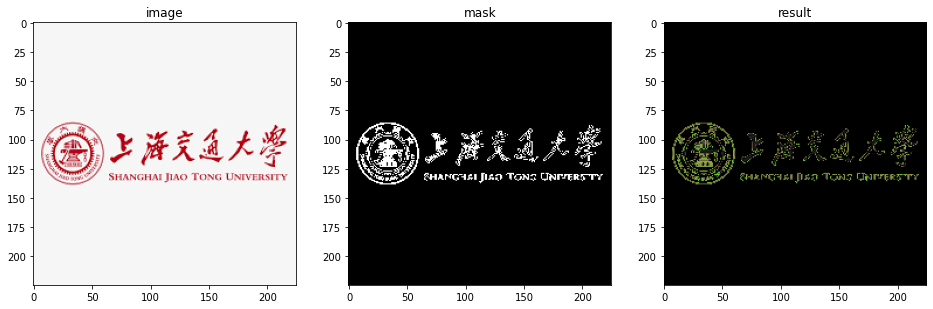

In [8]:
# Filter Color
image_logo = cv2.imread("images/sjtu-logo.png")
image_logo_hsv = cv2.cvtColor(image_logo, cv2.COLOR_BGR2HSV)
image_logo = cv2.cvtColor(image_logo, cv2.COLOR_BGR2RGB)

# Threshold of blue in HSV space
lower_blue = np.array([60, 35, 140])
upper_blue = np.array([180, 255, 255])

# preparing the mask to overlay
mask = cv2.inRange(image_logo_hsv, lower_blue, upper_blue)
    
# The black region in the mask has the value of 0,
# so when multiplied with original image removes all non-blue regions
result = cv2.bitwise_and(image_logo, image_logo, mask = mask)

# convert for imshow
mask = gray_to_color(mask)
result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)

images = [image_logo, mask, result]
show_images(1,3, images, titles=["image", "mask", "result"])
